# Import librearys

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [129]:
df = pd.read_csv("loan_status.csv")

In [130]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [131]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
379,LP002225,Male,Yes,2,Graduate,No,5391,0.0,130.0,360.0,1.0,Urban,Y
26,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
137,LP001491,Male,Yes,2,Graduate,Yes,3316,3500.0,88.0,360.0,1.0,Urban,Y
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
312,LP002006,Female,No,0,Graduate,No,2507,0.0,56.0,360.0,1.0,Rural,Y
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
469,LP002505,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,NaN,Urban,Y
140,LP001497,Male,Yes,2,Graduate,No,5042,2083.0,185.0,360.0,1.0,Rural,N
259,LP001864,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,NaN,Semiurban,N


In [132]:
df.shape

(614, 13)

# Preprocessing Data

In [133]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [134]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [136]:
df = df.drop(['Gender','Married'], axis=1)

In [137]:
df.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [138]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [139]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [140]:
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})

In [141]:
df.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [142]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [143]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [144]:
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate': 0})

In [145]:
df.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [146]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [147]:
df['Property_Area'] = df['Property_Area'].map({'Urban':1,'Rural':2,'Semiurban': 3})

In [148]:
df.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,Y
1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,N
2,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,Y
3,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,Y
4,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,Y


In [149]:
df.describe()

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,2.050489
std,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.840875
min,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000
25%,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000
50%,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2.000000
75%,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,3.000000
max,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000


In [150]:
df.isnull().sum()

Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [151]:
 df = df.drop(['Self_Employed'], axis = 1)

In [152]:
##df.groupby([""]).mean()

In [153]:
df.LoanAmount.mean()

146.41216216216216

In [154]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [155]:
df.Loan_Amount_Term.mean()

342.0

In [156]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

In [157]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [158]:
df.Credit_History.median()

1.0

In [159]:
df.Credit_History.mode()

0    1.0
Name: Credit_History, dtype: float64

In [160]:
df.Credit_History = df.Credit_History.fillna(df.Credit_History.median())

In [161]:
df.isnull().sum()

Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [162]:
df=df[df['Credit_History'] != ' ']

In [163]:
df.isnull().sum()

Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [164]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [165]:
df = df.drop("Dependents", axis = 1)

In [166]:
df.isnull().sum()

Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [167]:

df

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,5849,0.0,146.412162,360.0,1.0,1,Y
1,1,4583,1508.0,128.000000,360.0,1.0,2,N
2,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,1,6000,0.0,141.000000,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...
609,1,2900,0.0,71.000000,360.0,1.0,2,Y
610,1,4106,0.0,40.000000,180.0,1.0,2,Y
611,1,8072,240.0,253.000000,360.0,1.0,1,Y
612,1,7583,0.0,187.000000,360.0,1.0,1,Y


In [168]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [169]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [170]:
df.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,5849,0.0,146.412162,360.0,1.0,1,1
1,1,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,3000,0.0,66.000000,360.0,1.0,1,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,6000,0.0,141.000000,360.0,1.0,1,1


In [171]:
X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [172]:
X.head()


,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,5849,0.0,146.412162,360.0,1.0,1
1,1,4583,1508.0,128.000000,360.0,1.0,2
2,1,3000,0.0,66.000000,360.0,1.0,1
3,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,6000,0.0,141.000000,360.0,1.0,1


In [173]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# separated depnedent value and independent value 

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42)

# LogisticRegression Model

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
classifier = LogisticRegression()

#### Highper parameter tuning using GridSearchCV

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
parameter = {'penalty':['l1','l2','l2','elasticnet'], 'C':[1,2,3,4,5,6,8,10,20,40,50],'max_iter':[100,200,300]}

In [194]:
classifier_regression = GridSearchCV(classifier,param_grid= parameter,scoring='accuracy',cv=5)

In [196]:
classifier_regression.fit(X_train,y_train)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 8, 10, 20, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'l2', 'elasticnet']},
             scoring='accuracy')

In [202]:
print(classifier_regression.best_params_)

{'C': 1, 'max_iter': 200, 'penalty': 'l2'}


In [215]:
test_score = classifier_regression.best_score_
print(test_score)

0.8199780701754384


In [205]:
y = classifier_regression.predict(X_test)

In [206]:
print(y)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1]


In [187]:
print(y_test)

350    1
377    1
163    1
609    1
132    1
      ..
184    1
289    1
527    1
573    0
428    1
Name: Loan_Status, Length: 136, dtype: int64


In [214]:
### print(classifier_regression.summmy())

In [207]:
from sklearn.metrics import accuracy_score,classification_report

In [208]:
score= accuracy_score(y,y_test)

In [190]:
print(score)

0.7794117647058824


In [209]:
print(classification_report(y,y_test))

              precision    recall  f1-score   support

           0       0.42      0.91      0.57        22
           1       0.98      0.75      0.85       114

    accuracy                           0.78       136
   macro avg       0.70      0.83      0.71       136
weighted avg       0.89      0.78      0.81       136



In [232]:

x = ['test','traning']
y = [test_score,score]

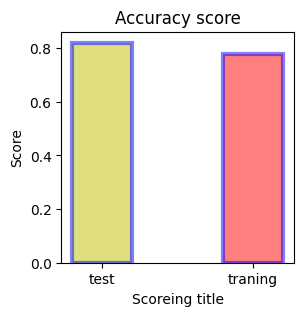

In [248]:
plt.figure(figsize=(3,3))
plt.title("Accuracy score")
plt.xlabel("Scoreing title")
plt.ylabel("Score")
color = ['y','r']
plt.bar(x,y, width = 0.4, color = color, edgecolor = 'b', linewidth = 3, alpha = 0.5)
plt.show()
        

In [210]:
result = classifier_regression.predict([[1,5849,0.0,146.412162,360.0,1.0,1]])

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [211]:
print(result)

[1]


#  SVM